In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### Question 1

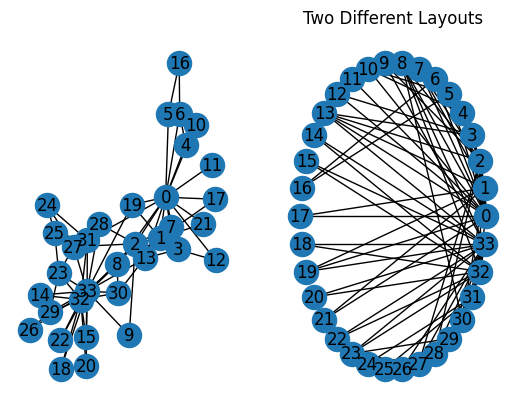

In [19]:
fig,ax = plt.subplots(1,2)
plt.title('Two Different Layouts')
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,ax=ax[0])
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels=True,ax=ax[1])


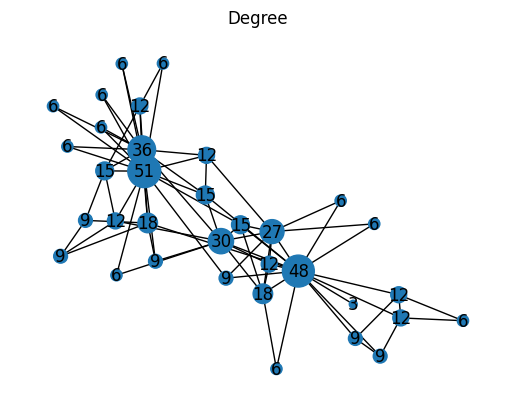

In [35]:
def Draw(network,layout,centrality_name,centrality_metric):
    G = network
    pos= layout
    title = centrality_name
    for i in centrality_metric.keys():
        centrality_metric[i] = int(centrality_metric[i]*100)
    size = [i*11 for i in centrality_metric.values()]
    plt.title(title)
    nx.draw(G,pos,with_labels=True,labels=centrality_metric,node_size=size)
    plt.show()


G = nx.karate_club_graph()
pos = nx.spring_layout(G)
centrality_name = "Degree"
centrality_value = nx.degree_centrality(G)
Draw(G,pos,centrality_name,centrality_value)    


In [ ]:
def centrality_type(centrality_name):
    